<a href="https://colab.research.google.com/github/JheevaShankar/FCV-experiment/blob/main/Exp_no_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

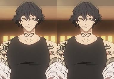

Number of blobs detected: 0


Saving Endo Yamato.jpeg to Endo Yamato (1).jpeg


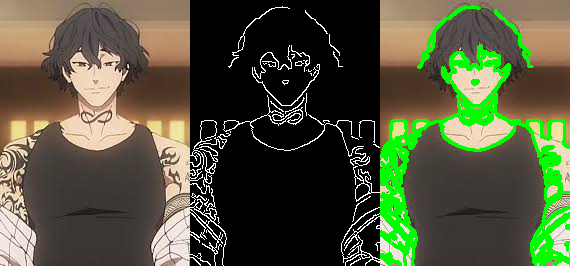

Number of contours found: 54
IMAGE LOADED SUCCESSFULLY
Image Shape: (266, 190, 3)


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# ✅ Your exact image path
img = cv2.imread("/content/Endo Yamato.jpeg")

if img is None:
    print("❌ Image not loaded. Check the file path.")
else:
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Setup SimpleBlobDetector parameters
    params = cv2.SimpleBlobDetector_Params()
    params.filterByColor = True
    params.blobColor = 255
    params.filterByArea = True
    params.minArea = 500
    params.maxArea = 2000
    params.filterByCircularity = True
    params.minCircularity = 0.5

    # Create detector
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs
    keypoints = detector.detect(gray_img)

    # Draw blobs
    blob_img = cv2.drawKeypoints(img, keypoints, np.array([]), (0, 0, 255),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # ✅ Resize images to smaller size (e.g., 30% of original)
    scale_percent = 30  # ← Change this percentage to make it smaller or bigger
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    img_small = cv2.resize(img, dim)
    blob_img_small = cv2.resize(blob_img, dim)

    # Combine images side by side
    combined = np.hstack((img_small, blob_img_small))

    # Show combined image
    cv2_imshow(combined)

    # Print number of blobs
    print(f"Number of blobs detected: {len(keypoints)}")
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Use the exact uploaded filename
img = cv2.imread("/content/Endo Yamato.jpeg")

if img is None:
    print("❌ Image not loaded. Check the file name.")
else:
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

    # Detect edges
    edges = cv2.Canny(blurred_img, 100, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a copy
    contour_img = img.copy()
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

    # Convert edge image to 3 channels for stacking
    edges_color = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Resize if needed (optional, to ensure all images same size)
    height, width = img.shape[:2]
    edges_color = cv2.resize(edges_color, (width, height))
    contour_img = cv2.resize(contour_img, (width, height))

    # Stack images horizontally
    combined = np.hstack((img, edges_color, contour_img))

    # Display combined image
    cv2_imshow(combined)

    print(f"Number of contours found: {len(contours)}")
    print("IMAGE LOADED SUCCESSFULLY")
    print(f"Image Shape: {img.shape}")